<h1><font color="Blue"> Serious math expression parser with standard order of operations (PEMDAS) without parenthesis  </font> </h1>

## Introduction

**<font color="OrangeRed">Rules :</font>**
* Input is a string of mathematics expression consisting of addition, subtraction, multiplication, division, and exponent.
* Output is a nested parenthesis expression representing a binary tree indicating which operator will be applied first.

**Example 1** \
**Input :**&nbsp;<samp>"3\*2+5/7^9"</samp>\
**Output :**&nbsp;<samp>(3\*2)+(5/(7^9))</samp><br><br>
**Example 2** \
**Input :**&nbsp;<samp>1+1/1+1\*1+1^1</samp>\
**Output :**&nbsp;<samp>((1+(1/1))+(1\*1))+(1\*1)</samp><br><br>
**Example 3** \
**Input :**&nbsp;<samp>-3/4+1/3-5^2\*2^9</samp>\
**Output :**&nbsp;<samp>(((-(3/4))+(1/3))-((5^2)\*(2^9)))</samp>
<!-- Write your comments here -->

###The standard order of operations (PEMDAS)

**<font color="violet">PEMDAS</font>** is a set of rules to perform operations in an arithmetic expression.

**P** – **<font color="violet">P</font>**arentheses  [ { ( ) } ]

**E** – **<font color="violet">E</font>**xponents (Powers and Roots)

**MD** - **<font color="violet">M</font>**ultiplication and **<font color="violet">D</font>**ivision (left to right) (× and ÷)

**AS** – **<font color="violet">A</font>**ddition  and **<font color="violet">S</font>**ubtraction (left to right) (+ and -)

##Algorithm for solving our selected problem

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def blank_diagram(fig_width=16, fig_height=9,
                  bg_color="antiquewhite", color="midnightblue"):
    fig = plt.figure(figsize=(fig_width / 2.54, fig_height / 2.54))
    ax = fig.add_axes((0, 0, 1, 1))
    ax.set_xlim(0, fig_width)
    ax.set_ylim(0, fig_height)
    ax.set_facecolor(bg_color)

    ax.tick_params(bottom=False, top=False,
                   left=False, right=False)
    ax.tick_params(labelbottom=False, labeltop=False,
                   labelleft=False, labelright=False)

    ax.spines["top"].set_color(color)
    ax.spines["bottom"].set_color(color)
    ax.spines["left"].set_color(color)
    ax.spines["right"].set_color(color)
    ax.spines["top"].set_linewidth(2)
    ax.spines["bottom"].set_linewidth(2)
    ax.spines["left"].set_linewidth(2)
    ax.spines["right"].set_linewidth(2)

    return fig, ax

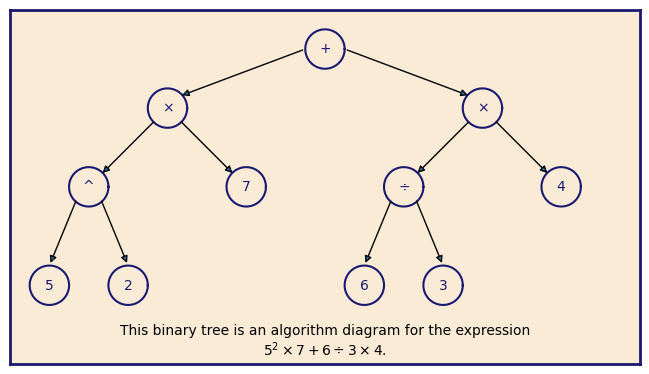

In [ ]:
fig, ax = blank_diagram()
centers = [(8, 8),
           (4, 6.5),(12, 6.5),
           (2,4.5),(6,4.5),(10,4.5),(14,4.5),
           (1,2),(3,2),(9,2),(11,2)]
radii = 0.5
texts = [r'$+$',
         r'$\times$',r"$\times$",
         "^",7,r"$\div$",4,
         5,2,6,3]

# Draw circles with text in the center

for i, center in enumerate(centers):
    x, y = center
    theta = np.linspace(0, 2 * np.pi, 100)
    ax.plot(
        x + radii * np.cos(theta),
        y + radii * np.sin(theta),
        color="midnightblue",
    )
    ax.text(
        x, y,
        texts[i],
        horizontalalignment="center",
        verticalalignment="center",
        color="midnightblue",
    )

# Draw arrows connecting them
ax.annotate(
    "",(centers[1][0]+0.3, centers[1][1]+0.3),(centers[0][0]-radii, centers[0][1]),arrowprops=dict(arrowstyle = "-|>"),) # (terminal,x),(terminal,y)->(initial,x),(initial,y)
ax.annotate(
    "",(centers[2][0]-0.3, centers[2][1]+0.3),(centers[0][0]+radii, centers[0][1]),arrowprops=dict(arrowstyle = "-|>"),)

ax.annotate(
    "",(centers[3][0]+0.3, centers[3][1]+0.3),(centers[1][0]-0.3, centers[1][1]-0.3),arrowprops=dict(arrowstyle = "-|>"),)
ax.annotate(
    "",(centers[4][0]-0.3, centers[4][1]+0.3),(centers[1][0]+0.3, centers[1][1]-0.3),arrowprops=dict(arrowstyle = "-|>"),)
ax.annotate(
    "",(centers[5][0]+0.3, centers[5][1]+0.3),(centers[2][0]-0.3, centers[2][1]-0.3),arrowprops=dict(arrowstyle = "-|>"),)
ax.annotate(
    "",(centers[6][0]-0.3, centers[6][1]+0.3),(centers[2][0]+0.3, centers[2][1]-0.3),arrowprops=dict(arrowstyle = "-|>"),)
ax.annotate(
    "",(centers[7][0], centers[7][1]+radii),(centers[3][0]-0.3, centers[3][1]-0.3),arrowprops=dict(arrowstyle = "-|>"),)
ax.annotate(
    "",(centers[8][0], centers[8][1]+radii),(centers[3][0]+0.3, centers[3][1]-0.3),arrowprops=dict(arrowstyle = "-|>"),)
ax.annotate(
    "",(centers[9][0], centers[9][1]+radii),(centers[5][0]-0.3, centers[3][1]-0.3),arrowprops=dict(arrowstyle = "-|>"),)
ax.annotate(
    "",(centers[10][0], centers[10][1]+radii),(centers[5][0]+0.3, centers[3][1]-0.3),arrowprops=dict(arrowstyle = "-|>"),)
ax.text(8, 0.2,"This binary tree is an algorithm diagram for the expression"+"\n"+r'$5^2\times 7+ 6\div3\times4.$',horizontalalignment="center")
fig.show()

In [ ]:
# "5^2*7+6/3*4"

Our algorithm consist of algorithm for split and algorithm for take the bracket.\
**1. Find the operator for split an expression into two components.**
<h4>$5^2\times7+6\div3\times4$</h4>
<h4>$5^2\times7$ <font color="MediumSpringGreen">$+$</font> $6\div3\times4$</h4>
<h4>$5^2\times7$ <font color="Salmon">$+$</font> $6\div3$ <font color="MediumSpringGreen">$\times$</font> $4$</h4>
<h4>$5^2\times7$ <font color="Salmon">$+$</font> $6$ <font color="MediumSpringGreen">$\div$</font> $3$ <font color="Salmon">$\times$</font> $4$</h4>
<h4>$5^2$ <font color="MediumSpringGreen">$\times$</font> $7$ <font color="Salmon">$+$</font> $6$ <font color="Salmon">$\div$</font> $3$ <font color="Salmon">$\times$</font> $4$</h4>
<h4><font color="MediumSpringGreen">$5^2$</font> <font color="Salmon">$\times$</font> $7$ <font color="Salmon">$+$</font> $6$ <font color="Salmon">$\div$</font> $3$ <font color="Salmon">$\times$</font> $4$</h4>
<h4><font color="Salmon">$5^2$</font> <font color="Salmon">$\times$</font> $7$ <font color="Salmon">$+$</font> $6$ <font color="Salmon">$\div$</font> $3$ <font color="Salmon">$\times$</font> $4$</h4>

**2. Take the bracket into expression.**
<h4>$5^2 \times 7+6 \div 3\times 4$</h4>
<!--  -->
<h4>$($<font color="MediumSpringGreen">$5^2$</font>$)$ $\times$ $7+6\div3\times 4$</h4>
<!--  -->
<h4>$((5^2)$ <font color="MediumSpringGreen">$\times$</font> $7)+6\div3\times 4$</h4>
<!--  -->
<h4>$((5^2)\times7)+(6$ <font color="MediumSpringGreen">$\div$</font> $3)\times 4$</h4>
<!--  -->
<h4>$((5^2)\times7)+((6\div3)$ <font color="MediumSpringGreen">$\times$</font> $4)$</h4>
<!--  -->
<h4>$(((5^2)\times7)$ <font color="MediumSpringGreen">$+$</font> $((6\div3)\times4))$</h4>

In [ ]:
# "(((5^2)*7)+((6/3)*4))"

<!--child node  -->
<h3><font color="OrangeRed">Remark :</font> </h3>
For the same child node Level, the priority for each node in the binary tree is equal. e.g.
<h4>$5^2$ <font color="MediumSpringGreen">$\times$</font> $7$ <font color="Salmon">$+$</font> $6\div3$ <font color="MediumSpringGreen">$\times$</font> $4$</h4>

## Source Code & Recursive invariant

In [ ]:
def Math_exp(eq) :

    #ลำดับ operation
    op1 = ['+', '-']
    op2 = ['*', '/']
    op3 = '^'
    all_op = [op1, op2, op3]

    #ใช้สำหรับออก loop เมื่อเจอ operation แรกตามลำข้างต้น โดยไล่ดูจากท้าย
    out_loop = 0

    #Recursive invariant : Put parentheses in each sub-instance by order following PEMDAS.
    #หาจุดกึ่งกลาง(+-*/) สำหรับแบ่งซ้าย-ขวา
    for n in range(3) :
        for i in range(len(eq)) :
            if eq[-1-i] in all_op[n] :
                index_first_op = -1-i
                out_loop = 1
                break
        if out_loop == 1 :
            break
    #Sub-instance : The substring after a separated left-right step with
    #               the separate point that is the latest order of operation according to the principle of PEMDAS.
    #ทำการแบ่งซ้าย-ขวา
    if out_loop == 1 :
        eq_left = eq[:index_first_op] #Sub-instance
        eq_right = eq[index_first_op+1:] #Sub-instance

        #recursive สำหรับแบ่งซ้าย-ขวา ***
        eq_left = Math_exp(eq_left)
        eq_right = Math_exp(eq_right)

        #คำสั่งสำหรับเช็กแต่ละ step
        # print('eq_left: ' + eq_left)
        # print('operation: ' + eq[index_first_op])
        # print('eq_right: ' + eq_right)

        eq_ans = '(' + eq_left + eq[index_first_op] + eq_right + ')'
        return eq_ans
    else :
        #Simplest case : When there is no operation in the string of math expression
        #แบ่งซ้าย-ขวาจนแบ่งไม่ได้จึงให้ eq_left = eq หรือ eq_right = eq ***
        return eq #simplest

In [ ]:
# Pre-condition : Given the string of math expression consisting of
#                 addition, subtraction, multiplication, division and exponent with the numbers.
eq1 = '1+1/21+1*1+1^1'

#Post-condition : Take parenthesis into the string of math expressions considering
#                 the standard order(PEMDAS) of operations.
print(Math_exp(eq1))

(((1+(1/21))+(1*1))+(1^1))


<h2> Seperate left-right string </h2>

eq1 = '1+1/21+1*1+1^1'

eq_left = '1+1/21+1*1'

operation = '+'

eq_right = '1^1'

<h2> Loop invariant (find index of operation that's be seperate point) </h2>

In [ ]:
#Precondition : Given the string of math expression consisting of
#               addition, subtraction, multiplication, division and exponent with the numbers.
eq = '-1+1/21+1*1+1^1'

#ลำดับ operation ลำดับตาม PEMDAS
op1 = ['+', '-']
op2 = ['*', '/']
op3 = '^'
all_op = [op1, op2, op3]

#Exit condition : string = final operation follow that order PEMDAS
#                 implie outloop = 1
#ใช้สำหรับออก loop เมื่อเจอ operation แรกตามลำข้างต้น โดยไล่ดูจากท้าย
out_loop = 0

#Action : check string = final operation for
#        next index such that index -= 1 or next final operation follow that order PEMDAS.
#หาจุดกึ่งกลาง(+-*/) สำหรับแบ่งซ้าย-ขวา
for n in range(3) :
  for i in range(len(eq)) :

    #Loop invariant : string from index -1 to now there is no case that
    #                 string = final operation follow that order PEMDAS.

    if eq[-1-i] in all_op[n] :
      index_first_op = -1-i #Post-condition
      out_loop = 1 #Exit condition
      break
    if out_loop == 1 :
      break

# Post-condition : get index of the separate point(final) operation
#                  according to the principle of PEMDAS.
print(index_first_op)

-4


## Result

In [ ]:
import time
start=time.time()

eq1 = '1+1/21+1*1+1^1'
print(Math_exp(eq1))

end=time.time()
print(end-start)

(((1+(1/21))+(1*1))+(1^1))
0.0025365352630615234


In [ ]:
start=time.time()

eq2 = '3*2+5/7^9'
print(Math_exp(eq2))

end=time.time()
print(end-start)

((3*2)+(5/(7^9)))
0.00032210350036621094


In [ ]:
start=time.time()

eq3 = '-3/4+1/3-5^2*2^9'
print(Math_exp(eq3))

end=time.time()
print(end-start)

(((-(3/4))+(1/3))-((5^2)*(2^9)))
0.002106189727783203


In [ ]:
eq4 = '5^2*7+6/3*4'
print(Math_exp(eq4))

eq_left: 5
operation: ^
eq_right: 2
eq_left: (5^2)
operation: *
eq_right: 7
eq_left: 6
operation: /
eq_right: 3
eq_left: (6/3)
operation: *
eq_right: 4
eq_left: ((5^2)*7)
operation: +
eq_right: ((6/3)*4)
(((5^2)*7)+((6/3)*4))


##Analysis
###Recursive Structure

#### <font color=LightYellow> Main Problem </font>
Define arithmetic operations using parentheses determined as pre and post operations.

#### <font color=Cornsilk> Pre-condition </font>
Given the string of math expression consisting of addition, subtraction, multiplication, division and exponent with the numbers.
#### <font color=Cornsilk> Post-condition </font>
Take parenthesis into the string of math expressions considering the standard order(PEMDAS) of operations.
#### <font color=Cornsilk> Sub-instance </font>
The substring after a separated left-right step with the separate point that is the latest order of operation according to the principle of PEMDAS.
#### <font color=Cornsilk> Recursive invariant </font>
Put parentheses in each sub-instance by order following PEMDAS.
#### <font color=Cornsilk> Extra work for separated </font>
separated left-right step with the separate point that is the latest order of operation according to the principle of PEMDAS.
#### <font color=Cornsilk> Extra work for merge </font>
merge the left string math expression and right math expression with operation and dominated by parenthesis. It follows that\
‘(’ + left math expression + operation + right math expression + ‘)’.

### <font color=Cornsilk> Loop invariant (Extra work seperated) </font>
For finding the operation that's be the separate point according to the principle of PEMDAS.
#### <font color=Cornsilk>  Pre-condition </font>
Given the string of math expression consisting of addition, subtraction, multiplication, division and exponent with the numbers.
#### <font color=Cornsilk> Post-condition </font>
Get index of the separate point(final) operation according to the principle of PEMDAS.
#### <font color=Cornsilk> Exit condition </font>
String = final operation follow that order PEMDAS.
#### <font color=Cornsilk> Loop invariant </font>
String from index -1 to now there is no case that string = final operation follow that order PEMDAS.
#### <font color=Cornsilk> Action </font>
Check string = Final operation for next index such that index -= 1 or next final operation follow that order PEMDAS.


### Time Complexity

<!--[ตัวอย่าง TABLE](https://www.w3schools.com/html/html_tables.asp)-->
<!-- $\dfrac{3}{2}$ -->

<font color="Lime">
<table>
<!-- <caption>Table of Time Complexity</caption> -->
<caption><font color="White"><h4>Calculating Big - O</h4></caption>
  <thead>
    <th><font color="Blue">Level</th>
    <th><font color="Blue">Input Size</th>
    <th><font color="Blue">Work in Stack frame</th>
    <th><font color="Blue">Number of frames</th>
    <th><font color="Blue">Total work</th>
  </thead>
  <tbody>
  <tr>
    <td>$0$</td>
    <td>$n$</td>
    <td>$f(n)=n$</td>
    <td>$1$</td>
    <td>$n$</td>
  </tr>
  </thead>
  <tr>
    <td>$1$</td>
    <td>$\dfrac{n}{2}$</td>
    <td>$f\left(\dfrac{n}{2}\right)=\dfrac{n}{2}$</td>
    <td>$2$</td>
    <td>$n$</td>
  </tr>
  <tr>
    <td>$2$</td>
    <td>$\dfrac{n}{2^2}$</td>
    <td>$f\left(\dfrac{n}{2^2}\right)=\dfrac{n}{2^2}$</td>
    <td>$2^2$</td>
    <td>$n$</td>
  </tr>
    <tr>
    <td>$\vdots$</td>
    <td>$\vdots$</td>
    <td>$\vdots$</td>
    <td>$\vdots$</td>
    <td>$\vdots$</td>
  </tr>
    <tr>
    <td>$k=log_2n$</td>
    <td>$\dfrac{n}{2^k}$</td>
    <td>$f\left(\dfrac{n}{2^k}\right)=\dfrac{n}{2^k}$</td>
    <td>$2^k$</td>
    <td>$n$</td>
  </tr>
  </tbody>
</table>

<h4> $T(n) = aT\left(\dfrac{n}{b}\right) + f(n)$ </h4>

Where $T(n) =$ running time for input size $n$.\
$a =$ Number of stack frames per instance $= 2$.\
$b =$ Instance is broke.\
$f(n)$ = Running time for extra work size $n$.

At $a^L = 2^L : T(n) = 2T\left(\dfrac{n}{2}\right) + n$ &nbsp;&nbsp;then $O(f(n)\log(n)) = O(n\log(n))$

At $a^L < 2^L : T(n) = 2T\left(\dfrac{n}{<2}\right) + n$ &nbsp;&nbsp;then $O(f(n)) = O(n)$

when $L$  is level.
<!-- aᴸ = 2ᴸ -->

<h1><font color='Blue'> - - - Thank you for your attention - - -  </font> </h1>

# Addition

The Problem occur when the input case  have operations in the same level in PEMDAS such that (+,-) if we use forward tracking the parenthesis will place in the long position that makes the path of calculation will not corresponding by PEMDAS and the answer will be wrong.
<h3>Example : $1-3+2$</h3>
<h3>Backward step : $(1-3)+2$ is <font color="Lime">correct.</font></h3>
<h3>Forward step : $1-(3+2)$ is <font color="orangered">wrong.</font></h3>

<!-- 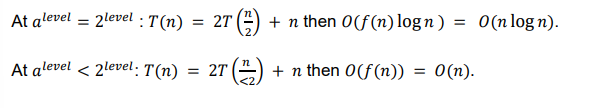 -->

<!-- At $a^L < 2^L : T(n) = 2T\left(\dfrac{n}{<2}\right) + n$\
then $O(f(n)\log(n)) = O(n)$\
when $L$ is level -->